In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(x):
    return 3*x**2 + 4*x - 5

def f_dash(x):
    return 6*x + 4

In [3]:
f(3.0)

34.0

In [4]:
xs = np.arange(-5,5,.25)
ys = f(xs)
y_dash = f_dash(xs)
ys

array([50.    , 43.6875, 37.75  , 32.1875, 27.    , 22.1875, 17.75  ,
       13.6875, 10.    ,  6.6875,  3.75  ,  1.1875, -1.    , -2.8125,
       -4.25  , -5.3125, -6.    , -6.3125, -6.25  , -5.8125, -5.    ,
       -3.8125, -2.25  , -0.3125,  2.    ,  4.6875,  7.75  , 11.1875,
       15.    , 19.1875, 23.75  , 28.6875, 34.    , 39.6875, 45.75  ,
       52.1875, 59.    , 66.1875, 73.75  , 81.6875])

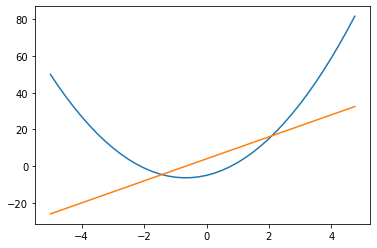

In [5]:
plt.plot(xs,ys)
plt.plot(xs,y_dash)

In [6]:
h = 1e-12
x = -2/3
(f(x+h)-f(x))/h

0.0

In [7]:
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


In [8]:
h = 1e-7
a = 2.0
b = -3.0
c = 10.0

## changing the variable by a tiny bit and looking at the change in the function
d1 = a*b+c
c += h
d2 = a*b+c

print(d1,d2)
print("slope",(d2-d1)/h)

4.0 4.000000099999999
slope 0.999999993922529


In [9]:
class Value:
    def __init__(self,data,_children=(),_op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        
    ## python internlly uses this function to return the data
    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other),"+")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),"*")
        return out
        

In [10]:
a = Value(2.0,label="a")
b = Value(-3.0,label="b")
c = Value(10.0,label="c")
e = a*b; e.label="e"
d = e+c; d.label="d"
f = Value(-2.0, label="%%file")
L = d*f; L.label="l"
L

Value(data=-8.0)

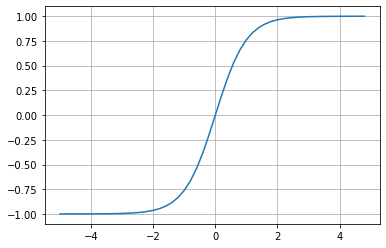

In [9]:
plt.plot(np.arange(-5,5,.2), np.tanh(np.arange(-5,5,.2))); plt.grid()

In [ ]:
plt.plot(np.arange(-5,5,.2), np.tanh(np.arange(-5,5,.2))); plt.grid()

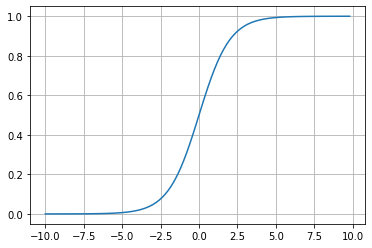

In [21]:
plt.plot(np.arange(-10,10,.2) ,1 / (1 + np.exp(-np.arange(-10,10,.2))));plt.grid()

In [19]:
float(1 > 0)

1.0

In [23]:
[2.,3.,6.] + [3.0]

[2.0, 3.0, 6.0, 3.0]

In [20]:
import torch
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [34]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={'rankdir':"LR"})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label ,n.data, n.grad), shape='record')
        if n._op:
            dot.node(name= uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot
        